# Financial Planning with APIs and Simulations

Create two financial analysis tools with a single Jupyter notebook:

1. Tool 1: A financial planner for *emergencies*. 
2. Tool 2: A financial planner for **retirement**. 

While the first tool is more an account summary page for all their held assets, the second tool forecasts portfolio performance.  The goal is to 1) allow the credit union members to visualize their current savings 2) see their portfolio's perspective performance in 30 yeaers 3) determine if they have enough reserves for an emergency fund.

In [16]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

## CODE FUNCTIONS

In [6]:
def API_CryptoCoinSetup(crypto_coins=dict):
    
    """
    This function takes a diction that has the name of the coins
    invested in and there symbol. It uses that dictionary to return
    another dictionary of urls names (keys) and actual urls(values)
    to be used down stream to pull the relevant information
    """
    
    coin_urls =[]
    coin_keys =[]
    api_dict  ={}
    
    for key in coin_dict:
        coin_keys = key+'_url'
        coin_urls = "https://api.alternative.me/v2/ticker/" + key + "/" +"?convert=USD"
        api_dict[coin_keys] = coin_urls
    
  
    return(api_dict)


In [50]:
def API_CryptoPrices(crypto_coins=dict,):
    
    """
    This function takes a dictionary which has the crypto api calls for 
    specific coins the credit union is investing in. It uses a for loop
    the create the eth_responce and btc_responce that obtains the json 
    of data from the API. The json is printed out and the prices for each
    coin are pulled for whenever the code is run
    
    """
    
    # API USAGE: BTC AND ETH PRICE INFORMATION
    # PART 1: Crypto API Call endpoint URLs for the held cryptocurrency assets
    #      btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
    #      eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
    
    #btc_response
    #eth_response

    for key in crypto_coins:
        if key == "Ethereum_url":
            eth_response = requests.get(crypto_coins[key]).json()
        elif key == "Bitcoin_url":
            btc_response = requests.get(crypto_coins[key]).json()

    # Use the json.dumps function to review the response data from the API call
    # NOTE: Indent and sort_keys parameters used for readability
    
    print(f"BITCOIN")
    print(json.dumps(btc_response, indent=4, sort_keys=True))
    print("\n")
    print(f"ETHEREUM")
    print(json.dumps(eth_response, indent=4, sort_keys=True))
    print("\n")
  
    
    # Navigate the BTC response object to access the current price of BTC
    btc_price = btc_response['data']['1']['quotes']['USD']['price']

    # Print the current price of BTC
    eth_price = eth_response['data']['1027']['quotes']['USD']['price']
 
    return(eth_price, btc_price)   

In [51]:
def create_savings_df(idx=list,cols=list,data=list):
    
    """
    This function takes 3 lists and uses them to fashion a dataframe
    that is going to be used for a pie chart.
         1. idx:  the index column is added to the dataframe then `set_index` is used to set the index
         2. cols: this has the column we want here `amount`
         3. data: this has our data
    It returns a dataframe
    """
    
    personal_savings = pd.DataFrame(list(data),
              columns=cols)
    
    personal_savings['index'] = indx_list
    personal_savings = personal_savings.set_index('index')

    return(personal_savings)

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet using the Requests Library

**Aim**: Determine the current value of a member’s cryptocurrency wallet. Collect the current prices for the Bitcoin and Ethereum using the Python Requests library. The member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). 

**Steps**:
1. Create a variable named `monthly_income` set its value to `12000`.
2. Use Requests library. Get the current price (USD) of BTC and ETH using the API endpoints.
3. Navigate the JSON response object to access the current price of each coin, store each in a variable.
4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.


#### FINANCIAL PLANNER CODE

#### GIVENS

In [52]:
# 1. Need to know whart coins the Credit Union believes in
coin_dict ={'Ethereum':'ETH', 'Bitcoin':'BTC'}
key_iterable = coin_dict.keys()
key_list = list(key_iterable)

# 2. The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

# 3. The monthly amount for the member's household income
monthly_income = 12000


#### FUNCTIONS & CALCULATIONS

In [53]:
### FUNCTION CALL
### 1. API_CryptoCoinSetup
### 2. API_CryptoPrices

url_dict = API_CryptoCoinSetup(coin_dict)
eth_price,btc_price = API_CryptoPrices(url_dict)

print(f"CALCULATIONS:")
eth_curr = "${:,.2f}".format(eth_price)
btc_curr = "${:,.2f}".format(btc_price)
print(f"1. The price of one Ethereum coin(USD): {eth_curr}")
print(f"2. The price of one Bitcoin coin(USD): {btc_curr}")


# Compute the current value of the BTC holding 
btc_value = (btc_price * btc_coins) 
btc_holding ="${:,.2f}".format(btc_value)
eth_value = (eth_price * eth_coins)
eth_holding="${:,.2f}".format(eth_value)

# Print current value of your holding in BTC
print(f"3. This is the value of your total BTC holding in USD: {btc_holding}")
print(f"4. This is the value of your total ETH holding in USD: {eth_holding}")


# Compute the total value of the cryptocurrency wallet
total_crypto_wallet = (btc_value + eth_value)
crypto_wallet_balance = "${:,.2f}".format(total_crypto_wallet)

# Print current cryptocurrency wallet balance
print(f"5. This is the values of your total crypto wallet {crypto_wallet_balance}:")



BITCOIN
{
    "data": {
        "1": {
            "circulating_supply": 19021131,
            "id": 1,
            "last_updated": 1650832438,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 753310536645,
                    "percent_change_1h": -0.567648834910676,
                    "percent_change_24h": -0.638720363007629,
                    "percent_change_7d": -2.21836533368129,
                    "percentage_change_1h": -0.567648834910676,
                    "percentage_change_24h": -0.638720363007629,
                    "percentage_change_7d": -2.21836533368129,
                    "price": 39553.0,
                    "volume_24h": 16846979254
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19021131,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_c

# Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

Determine the current value of a member’s stock and bond holdings. Make an API call to Alpaca via the Alpaca SDK to get the current closing prices of **1) SPDR S&P 500 ETF Trust** (ticker: SPY) **2)iShares Core US Aggregate Bond ETF** (ticker: AGG).

**STEPS:**
1. Create an environment file (`.env`) to store your Alpaca API key and Alpaca secret key values.
2. Set the variables for the Alpaca API and secret keys.(Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object)
3. Set the following parameters for the Alpaca API call:
    - `tickers`: Use the tickers for the member’s stock and bond holdings.
    - `timeframe`: Use a time frame of one day.
    - `start_date` and `end_date`: Use the same date for these parametersv (`2020-08-07`).
4. Get the current closing prices for `SPY` & `AGG` by using the Alpaca `get_bars` function. Format response as a Pandas df
5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.
6. Calculate the value (USD) of the current amount of stocks and bond shares in the portfolio.


#### PORTFOLIO DETAILS AND ALPACA SDK SET-UP

#### GIVENS

In [55]:
## USING THE ALPACA SDK

# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

# Load the environment variables from the .env file
load_dotenv('app.env')

# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


#### API Parameters

In [57]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Set the tickers for both the bond and stock portion of the portfolio
tickers= ['SPY','AGG']

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date to 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()



#### USING ALPACA'S `get_bars` FUNCTION FOR CLOSING PRICES

In [62]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# `df` property after the function

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
display(df_portfolio.head())

# Reorganize the DataFrame
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# Keep Only the date piece from the TimeStamp Index
df_portfolio = pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])
df_portfolio.index = df_portfolio.index.date

# Checking on what my Dataframe looks now 
display(df_portfolio.head())

# Access the closing price for AGG from the Alpaca DataFrame
# Note: its cleaner and neater to just have a dataframe of closing prices 
# Please don't remove points.

df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

#NOTE:
#     1. `df_closing_prices.head()` - this should have one row with two values. The closes price of SPY and AGG
#     2. `df_closing_prices.dtypes` - this was executed to  verify that  the prices are floats (which they are)

display(df_closing_prices.head())
print("\n")
print(df_closing_prices.dtypes)
print("\n")

# Saving `SPY` and `AGG` closing prices to variables
agg_close_price = df_closing_prices.iat[0, 0]
spy_close_price = df_closing_prices.iat[0, 1]

# Calculate the current value of the bond portion of the portfolio
agg_value = (agg_close_price * agg_shares)
spy_value = (spy_close_price * spy_shares)
total_stocks_bonds = agg_value + spy_value

# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
portfolio_val = total_stocks_bonds + total_crypto_wallet

# Just for show and fancy stylings
agg_close = "${:,.2f}".format(agg_close_price)
spy_close = "${:,.2f}".format(spy_close_price)
agg_val = "${:,.2f}".format(agg_value)
spy_val = "${:,.2f}".format(spy_value)
tot_holdings_val = "${:,.2f}".format(total_stocks_bonds)
tot_portfolio_val = "${:,.2f}".format(portfolio_val)

# PRINT STATEMENTS SHOWING CALCULATIONS
print("CALCULATIONS:")
print(f"1. This is the AGG Closing Price: {agg_close}")
print(f"2. This is the SPY Closing Price: {spy_close} ")
print(f"3. This is the Total Value of your AGG Holdings: {agg_val}")
print(f"4. This is the Total Value of your SPY Holdings: {spy_val}")
print(f"5. This is the Value of your AGG & SPY Holdings: {tot_holdings_val}")
print(f"5. This is the Value of your Crypto Wallet, Stocks & Bond Holdings: {tot_portfolio_val}")

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.73,119.395,119.43,5559066,15246,119.475306,AGG
2020-08-07 04:00:00+00:00,333.29,334.88,332.300,334.57,57282821,350100,333.800372,SPY


AGG                                                            \
              open    high      low   close   volume trade_count        vwap   
2020-08-07  119.66  119.73  119.395  119.43  5559066       15246  119.475306   

               SPY                                                           
              open    high    low   close    volume trade_count        vwap  
2020-08-07  333.29  334.88  332.3  334.57  57282821      350100  333.800372

,AGG,SPY
2020-08-07,119.43,334.57




AGG    float64
SPY    float64
dtype: object


CALCULATIONS:
1. This is the AGG Closing Price: $119.43
2. This is the SPY Closing Price: $334.57 
3. This is the Total Value of your AGG Holdings: $23,886.00
4. This is the Total Value of your SPY Holdings: $36,802.70
5. This is the Value of your AGG & SPY Holdings: $60,688.70
5. This is the Value of your Crypto Wallet, Stocks & Bond Holdings: $123,774.00


### Evaluate the Emergency Fund

**AIM: Use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. Steps**

1. Create a Python list named `savings_data`:
    - `saving_data[0]`: the total value of the cryptocurrency wallet. 
    - `saving_data[1]`: the total value of the stock and bond portions of the portfolio.
2. Use the `savings_data` list to create a Pandas DataFrame(`savings_df`), display DataFrame. The function to create the DataFrame should take the following three parameters:
    - `savings_data`: Use the list that you just created.
    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.
    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.
3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio.
4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value` equal to three times the value of the member’s `monthly_income`. 
    2. Create a series of three if statements: 
        1. If the total portfolio value is greater than, congratulate the member for having enough money in this fund.
        2. Else if the total portfolio value is equal, congratulate the member on reaching this important financial goal.
        3. Else the total portfolio is less showing how many dollars away the member is from reaching the goal. 

In [69]:
# Consolidate financial assets data into a Python list
savings_data_list = []

cols_list = ['amount']
indx_list =['crypto','stock/bond']
savings_data = [total_stocks_bonds,portfolio_val]

# Review the Python list savings_data
print(f"These are the two values in the saving data list:")
print(savings_data)
print("------")
##print("\n")

# Create a Pandas DataFrame called savings_df 
savings_df = create_savings_df(indx_list,cols_list,savings_data)

# Display the savings_df DataFrame
print(f"This is the savings_df: ")
print(savings_df)

These are the two values in the saving data list:
[60688.7, 123773.997]
------
This is the savings_df: 
                amount
index                 
crypto       60688.700
stock/bond  123773.997


##### Use the `savings_df` dataframe to plot a pie chart showcasing the composition of the member’s portfolio. 

<AxesSubplot:title={'center':'Asset Breakdown: Crypto & Stocks/Bonds Valuation'}, ylabel='amount'>

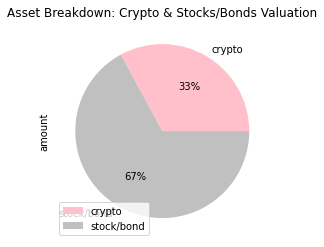

In [71]:
# Plot the Tot. Value of the member's portfolio (crypto and stock/bond) in a pie chart
#      1. The y-axis is the `amount`
colors = ['pink', 'silver']
savings_pie_grph = savings_df.plot(kind='pie',
                y='amount',
                autopct='%1.0f%%', colors=colors,
                title='Asset Breakdown: Crypto & Stocks/Bonds Valuation'
               )
savings_pie_grph

##### **Determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan.** 

In [72]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3.00 * monthly_income

# Evaluate the possibility of creating an emergency fund with 3 conditions:
if portfolio_val > emergency_fund_value:
    print(f"Congratulations, You have enough money in this fund")
elif portfolio_val == emergency_fund_value:
    print(f"Congratulations!!! Your Total Portfolio value is equal to the amount designated for an emergency savings")
else:
    print(f"Congrats, you are only ${emergency_fund_value - tot_portfolio_val} away from your goal")


Congratulations, You have enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).
2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.
3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. 
4. Generate the summary statistics for the Monte Carlo simulation.



In [74]:
# Set start and end dates of 3 years back from your current date
start_date_mc = pd.Timestamp("2017-04-21", tz="America/New_York").isoformat()
end_date_mc = pd.Timestamp("2020-04-21", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
#limit_rows = 1000

In [77]:
# Using the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The start and end dates are updated added the df property to the end of the call
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date_mc,
    end=end_date_mc
    #limit=limit_rows
).df

# Reorganize the DataFrame: Separate ticker data
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Check what the Separate Ticket Data looks like before concatenation
display(SPY.shape)
display(AGG.shape)

# Concatenate the ticker DataFrames
df_prices= pd.DataFrame()
df_prices= pd.concat([AGG,SPY],axis=1, keys=['AGG','SPY'])

# Checking what the  first and last 5 lines look like 
display(f" This is what the first 5 lines of the prices dataframe looks like: {df_prices.head()}")
display(f" This is what the first 5 lines of the prices dataframe looks like: {df_prices.tail()}")

(755, 7)

(755, 7)

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-04-21 04:00:00+00:00  109.40  109.4899  109.30  109.34  1539265   
2017-04-24 04:00:00+00:00  109.05  109.2200  109.00  109.18  2745689   
2017-04-25 04:00:00+00:00  108.99  109.0450  108.77  108.82  1888469   
2017-04-26 04:00:00+00:00  108.85  108.9700  108.77  108.96  2893801   
2017-04-27 04:00:00+00:00  108.94  109.1000  108.91  109.06  1660940   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2017-04-21 04:00:00+00:00        8708  109.386803  235.22  235.31  234.1300   
2017-04-24 04:00:00+00:00       10549  109.150827  237.17  237.41  234.5628   
2017-04-25 04:00:00+00:00       10064  108.912429  237.93  238.95  237.8100   
2017-04-26 04:00:00+00:00       10145  108.884769  238.53  239.53  238.3500   
2017-04-27 04:00:00+00:00        7367  109.026595  238.74  238.95  237.9800   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-04-21 04:00:00+00:00  234.59  110389847      258915  234.784238  
2017-04-24 04:00:00+00:00  237.17  119209877      290927  236.615988  
2017-04-25 04:00:00+00:00  238.55   76698265      240232  238.459191  
2017-04-26 04:00:00+00:00  238.40   84702455      260064  238.801347  
2017-04-27 04:00:00+00:00  238.60   57410326      189214  238.526193

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2020-04-15 04:00:00+00:00  117.03  117.305  116.710  117.24  4367913   
2020-04-16 04:00:00+00:00  117.19  117.525  117.190  117.39  4744716   
2020-04-17 04:00:00+00:00  117.52  117.620  117.035  117.25  4949824   
2020-04-20 04:00:00+00:00  117.15  117.280  116.940  117.08  3856448   
2020-04-21 04:00:00+00:00  117.43  117.440  117.070  117.14  4660507   

                                                      SPY                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2020-04-15 04:00:00+00:00       19622  117.144903  277.52  283.9407  275.46   
2020-04-16 04:00:00+00:00       16906  117.399687  279.05  280.0300  275.76   
2020-04-17 04:00:00+00:00       25621  117.358347  285.41  287.3000  282.40   
2020-04-20 04:00:00+00:00       18509  117.030839  282.60  286.7912  281.35   
2020-04-21 04:00:00+00:00       19425  117.166762  276.48  278.0400  272.02   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-04-15 04:00:00+00:00  277.76  122419142      711143  277.829579  
2020-04-16 04:00:00+00:00  279.10  132899585      748803  278.834513  
2020-04-17 04:00:00+00:00  286.64  147287419      699791  284.304906  
2020-04-20 04:00:00+00:00  281.59  100126051      600462  283.731398  
2020-04-21 04:00:00+00:00  273.04  126387834      923555  274.755324

#### Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [78]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_year = MCSimulation(
    portfolio_data = df_prices,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_thirty_year.portfolio_data.head()


AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-04-21 04:00:00+00:00  109.40  109.4899  109.30  109.34  1539265   
2017-04-24 04:00:00+00:00  109.05  109.2200  109.00  109.18  2745689   
2017-04-25 04:00:00+00:00  108.99  109.0450  108.77  108.82  1888469   
2017-04-26 04:00:00+00:00  108.85  108.9700  108.77  108.96  2893801   
2017-04-27 04:00:00+00:00  108.94  109.1000  108.91  109.06  1660940   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-04-21 04:00:00+00:00        8708  109.386803          NaN  235.22   
2017-04-24 04:00:00+00:00       10549  109.150827    -0.001463  237.17   
2017-04-25 04:00:00+00:00       10064  108.912429    -0.003297  237.93   
2017-04-26 04:00:00+00:00       10145  108.884769     0.001287  238.53   
2017-04-27 04:00:00+00:00        7367  109.026595     0.000918  238.74   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2017-04-21 04:00:00+00:00  235.31  234.1300  234.59  110389847      258915   
2017-04-24 04:00:00+00:00  237.41  234.5628  237.17  119209877      290927   
2017-04-25 04:00:00+00:00  238.95  237.8100  238.55   76698265      240232   
2017-04-26 04:00:00+00:00  239.53  238.3500  238.40   84702455      260064   
2017-04-27 04:00:00+00:00  238.95  237.9800  238.60   57410326      189214   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-04-21 04:00:00+00:00  234.784238          NaN  
2017-04-24 04:00:00+00:00  236.615988     0.010998  
2017-04-25 04:00:00+00:00  238.459191     0.005819  
2017-04-26 04:00:00+00:00  238.801347    -0.000629  
2017-04-27 04:00:00+00:00  238.526193     0.000839

In [79]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/comdrpaquiot/Desktop/Fintech-WorkSpace/Python_Project/Mod5_Challenge/GitHub_Uploader/Challenge5_FinancialPlanning/Challenge5_FinancialPlanning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008253,1.006098,0.992512,1.002595,0.998880,1.000970,1.001584,0.995094,0.998594,1.007824,...,1.005154,1.004630,0.996747,1.006207,0.998405,0.997908,1.006152,1.001764,1.001233,0.996848
2,1.009995,1.016669,0.992902,1.008630,1.004047,0.994494,1.007313,0.989995,0.995111,1.002882,...,1.006756,1.012158,1.001224,1.008024,1.005682,0.995003,1.008761,1.000862,1.002618,0.999083
3,1.006659,1.019584,0.983944,1.011256,1.012052,0.988268,1.019424,0.994624,0.992298,1.009325,...,1.012094,1.025601,1.007402,1.000066,1.009778,0.986562,1.012961,0.992210,1.007533,1.004140
4,1.002740,1.014968,0.984675,1.008209,1.018781,0.970172,1.019794,0.997483,0.988574,1.010907,...,1.020977,1.024021,1.006035,0.999291,0.996608,0.990044,1.018579,0.988767,1.002129,0.999784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.969751,2.691881,2.395656,2.981225,6.260517,6.916246,2.816200,6.132198,3.771502,1.872378,...,6.915155,5.577726,3.134008,2.786076,4.214366,2.574528,5.289592,1.609830,2.896729,2.135066
7557,1.976409,2.686453,2.392005,2.999767,6.301926,6.956696,2.799915,6.086087,3.764942,1.883501,...,6.866283,5.554780,3.151511,2.800639,4.217081,2.576109,5.255691,1.612770,2.911897,2.139328
7558,1.982841,2.684624,2.382499,2.989713,6.301254,7.035336,2.788239,6.123475,3.726611,1.887468,...,6.826757,5.516465,3.112097,2.783460,4.226690,2.549341,5.198994,1.614292,2.941095,2.116563
7559,1.965902,2.685136,2.378786,3.002884,6.288322,7.003577,2.803226,6.117124,3.749594,1.900099,...,6.791296,5.491520,3.090034,2.805434,4.196107,2.551723,5.214413,1.601457,2.941627,2.105078


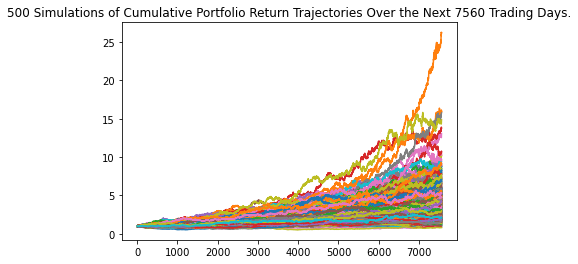

In [83]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# Plot simulation outcomes
MC_sim_line_plot = MC_thirty_year.plot_simulation()

# Save the plot for future use
MC_sim_line_plot.get_figure().savefig("MC_thirty_year_sim_plot.png", bbox_inches="tight")


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

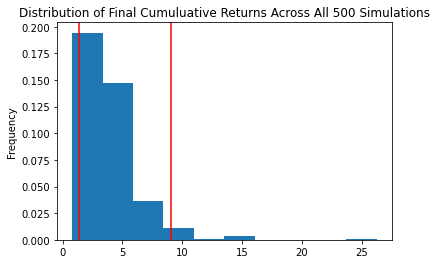

In [84]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_thirty_year.plot_distribution()

# Save the plot for future use
MC_sim_dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [85]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_thirty_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              3.904416
std               2.334129
min               0.800331
25%               2.482127
50%               3.363703
75%               4.722520
max              26.222406
95% CI Lower      1.377481
95% CI Upper      9.036649
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [215]:
# Print the current balance of the stock and bond portion of the members portfolio
print(tot_holdings_val)


$60,688.70


In [86]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return =  MC_summary_statistics[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return =  MC_summary_statistics[9] * total_stocks_bonds

# Print the result of your calculations
lower_cumltv_return = "${:,.2f}".format(ci_lower_thirty_cumulative_return)
upper_cumltv_return = "${:,.2f}".format(ci_upper_thirty_cumulative_return)

print(f"There is a 95% chance that an initial investment of {tot_holdings_val} in the portfolio")
print(f"over the next 30 years will end within in the range of {lower_cumltv_return} and {upper_cumltv_return} ")


There is a 95% chance that an initial investment of $60,688.70 in the portfolio
over the next 30 years will end within in the range of $83,597.52 and $548,422.50 


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [87]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_year = MCSimulation(
    portfolio_data = df_prices,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_ten_year.portfolio_data.head()



AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2017-04-21 04:00:00+00:00  109.40  109.4899  109.30  109.34  1539265   
2017-04-24 04:00:00+00:00  109.05  109.2200  109.00  109.18  2745689   
2017-04-25 04:00:00+00:00  108.99  109.0450  108.77  108.82  1888469   
2017-04-26 04:00:00+00:00  108.85  108.9700  108.77  108.96  2893801   
2017-04-27 04:00:00+00:00  108.94  109.1000  108.91  109.06  1660940   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-04-21 04:00:00+00:00        8708  109.386803          NaN  235.22   
2017-04-24 04:00:00+00:00       10549  109.150827    -0.001463  237.17   
2017-04-25 04:00:00+00:00       10064  108.912429    -0.003297  237.93   
2017-04-26 04:00:00+00:00       10145  108.884769     0.001287  238.53   
2017-04-27 04:00:00+00:00        7367  109.026595     0.000918  238.74   

                                                                            \
                             high       low   close     volume trade_count   
timestamp                                                                    
2017-04-21 04:00:00+00:00  235.31  234.1300  234.59  110389847      258915   
2017-04-24 04:00:00+00:00  237.41  234.5628  237.17  119209877      290927   
2017-04-25 04:00:00+00:00  238.95  237.8100  238.55   76698265      240232   
2017-04-26 04:00:00+00:00  239.53  238.3500  238.40   84702455      260064   
2017-04-27 04:00:00+00:00  238.95  237.9800  238.60   57410326      189214   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-04-21 04:00:00+00:00  234.784238          NaN  
2017-04-24 04:00:00+00:00  236.615988     0.010998  
2017-04-25 04:00:00+00:00  238.459191     0.005819  
2017-04-26 04:00:00+00:00  238.801347    -0.000629  
2017-04-27 04:00:00+00:00  238.526193     0.000839

In [88]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/comdrpaquiot/Desktop/Fintech-WorkSpace/Python_Project/Mod5_Challenge/GitHub_Uploader/Challenge5_FinancialPlanning/Challenge5_FinancialPlanning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003968,0.996696,0.999417,1.000035,1.003133,1.003822,1.000069,0.998516,0.998906,0.999204,...,0.998207,1.003909,1.011612,1.000415,1.001307,0.998441,0.992080,1.001593,1.002781,0.996299
2,1.002542,0.997702,0.996288,0.994534,1.005623,1.001248,0.994714,0.996807,0.994349,0.999380,...,0.997212,1.000231,1.012971,0.999741,1.003125,0.992724,0.988614,1.007155,1.009002,0.993575
3,1.003223,0.995110,1.000588,0.994296,1.004321,1.002493,0.995013,0.998544,0.996597,0.997926,...,0.994796,1.005450,1.007842,0.995907,1.007817,0.994050,0.988778,1.006474,1.003531,0.993109
4,1.004927,0.997483,1.004699,0.986922,1.004343,0.996370,0.996025,1.001485,0.997548,1.005150,...,0.998907,1.001483,1.008223,0.992295,1.003733,0.989380,0.987328,1.004726,1.002973,0.992775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.340684,1.714879,1.391500,1.105881,1.199133,1.592661,1.226361,1.615708,1.051752,1.829854,...,1.121279,1.347393,1.381216,2.138410,1.305923,1.183595,1.056257,1.290881,1.641617,1.189513
2517,1.343042,1.708583,1.373585,1.105873,1.201127,1.597219,1.225094,1.615958,1.043972,1.839905,...,1.115757,1.348719,1.377915,2.134561,1.301571,1.188154,1.053694,1.295958,1.632281,1.184167
2518,1.328095,1.698323,1.377901,1.105066,1.198839,1.601946,1.222029,1.612470,1.043309,1.848932,...,1.115475,1.348152,1.377523,2.131091,1.311064,1.188505,1.054879,1.293146,1.620359,1.185251
2519,1.340343,1.707714,1.376279,1.105696,1.195439,1.595224,1.228214,1.604137,1.041421,1.844302,...,1.116569,1.348104,1.374941,2.136241,1.313128,1.191337,1.056157,1.287498,1.623881,1.187486


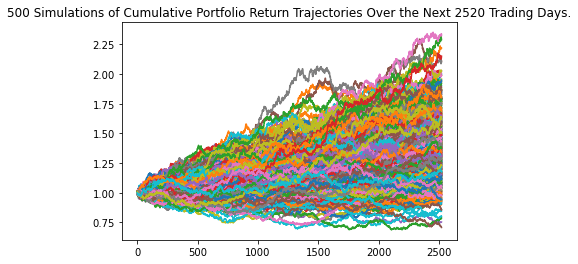

In [90]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot_2nd = MC_ten_year.plot_simulation()


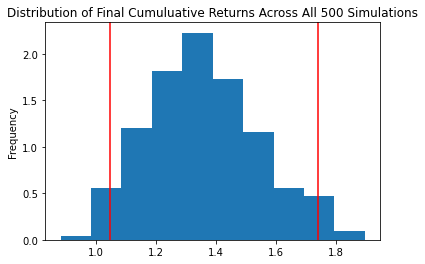

In [222]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot_2nd = MC_ten_year.plot_distribution()


In [91]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics_2nd = MC_ten_year.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_summary_statistics_2nd)

count           500.000000
mean              1.388901
std               0.273389
min               0.708003
25%               1.179971
50%               1.381968
75%               1.576866
max               2.325089
95% CI Lower      0.933175
95% CI Upper      1.937684
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [93]:
# Print the current balance of the stock and bond portion of the members portfolio
print(tot_holdings_val)


$60,688.70


In [94]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_summary_statistics_2nd[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = MC_summary_statistics_2nd[9] * total_stocks_bonds


# Print the result of your calculations
lower_cumltv_return_10y = "${:,.2f}".format(ci_lower_ten_cumulative_return)
upper_cumltv_return_10y = "${:,.2f}".format(ci_upper_ten_cumulative_return)

print(f"There is a 95% chance that an initial investment of {tot_holdings_val} in the portfolio,")
print(f"over the next 10 years will end within in the range of {lower_cumltv_return_10y} and {upper_cumltv_return_10y} ")


There is a 95% chance that an initial investment of $60,688.70 in the portfolio,
over the next 10 years will end within in the range of $56,633.15 and $117,595.54 


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

In [95]:
print(f"30 year lower estimation {lower_cumltv_return}, 10 year lower estimation {lower_cumltv_return_10y}")
print(f"30 year upper estimation {upper_cumltv_return}, 10 year upper estimation {upper_cumltv_return_10y }")

30 year lower estimation $83,597.52, 10 year lower estimation $56,633.15
30 year upper estimation $548,422.50, 10 year upper estimation $117,595.54


### ANSWER

From Investopedia we have the following:
"Most experts say your retirement income should be about 80% of your final pre-retirement annual income.1 That means if you make $100,000 annually at retirement, you need at least $80,000 per year to have a comfortable lifestyle after leaving the workforce."

Judging from that quopte alone, it is fair to say that this question is not nuanced enough to answer correctly. You cannot estimate what this person needs to retire without knowing:
1. What kind of lifestyle/quality of life does this person want after retirement? 
2. What will be their monthly and yearly withdrawals ?
3. What is their current salary?
We know that member's household income is $12,000? (Is this pre-taxes, generated by 2 people?)

What this question seeks to ask is whether an investor can make more money, or money equal to their projected returned by investing more in a more volatile asset for a shorter period of time. The answer comes down to which stock? For this stock here SPY. the answer is no.
However I want to show proof.

#### **SPY**
#####**Sharpe Ratio Chart**

-- <ins>The Sharpe Ratio</ins> shows whether the portfolio's excess returns are due to smart investment decisions or a result of taking a higher risk. The higher a portfolio's Sharpe ratio, the better its risk-adjusted performance. The current SPDR S&P 500 ETF Sharpe ratio is 0.23. A Sharpe ratio between 0 and 1.0 is considered sub-optimal.


#### **SPY**
##### **Sortino Ratio Chart**
-- <ins>The Sortino Ratio</ins> is an indicator that measures a portfolio's risk-adjusted performance. The Sortino ratio is the ratio of a portfolio's excess return to risk. It is widely used as an indicator of the "quality" of an investment fund or portfolio.  The current Sortino ratio is -0.13 - A Sortino ratio between 0 and 1.0 is considered sub-optimal.

You can see the work I did below but I reran the Monte Carlo assuming the same amount of starting capital, and got a new upper and lower limit with 95% certainty:

##### 80/20 ratio Scenario 1
-> 10 years lower w/SPY Stock:  $56,633.15
-> 10 years upper w/SPY Stock: $117,595.54

#### 80/20 ratio Scenario 2
-> 10 years lower w/ TSLA Stock:  $75,205.31
-> 10 years upper w/ TSLA Stock: $366,625.64

My guess and I am not a portfolio manager, is that the strategy of investing more in a more volatile asset for a shorter period of time can work if the right stock is picked. 

### CHECKING MY HYPOTHESIS

In [105]:
test_tickers = ['TSLA','AGG']

# Using the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The start and end dates are updated added the df property to the end of the call
test_prices_df = alpaca.get_bars(
    test_tickers,
    timeframe,
    start=start_date_mc,
    end=end_date_mc
    #limit=limit_rows
).df

#checking
display(test_prices_df.head())
display(test_prices_df.tail())

# Reorganize the DataFrame: Separate ticker data
AGG = test_prices_df[test_prices_df['symbol']=='AGG'].drop('symbol', axis=1)
TSLA = test_prices_df[test_prices_df['symbol']=='TSLA'].drop('symbol', axis=1)

# Check what the Separate Ticket Data looks like before concatenation
display(TSLA.shape)
display(AGG.shape)

# Concatenate the tsla and agg ticker DataFrames
tst_prices= pd.DataFrame()
tst_prices= pd.concat([AGG,TSLA],axis=1, keys=['AGG','TSLA'])
tst_prices.index = tst_prices.index.date

display(tst_prices.head())
display(tst_prices.tail())
# Checking what the  first and last 5 lines look like 
#display(f" This is what the first 5 lines of the prices dataframe looks like: {test_df_prices.head()}")
#display(f" This is what the first 5 lines of the prices dataframe looks like: {test_df_prices.tail()}")

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-04-21 04:00:00+00:00,109.40,109.4899,109.30,109.34,1539265,8708,109.386803,AGG
2017-04-24 04:00:00+00:00,109.05,109.2200,109.00,109.18,2745689,10549,109.150827,AGG
2017-04-25 04:00:00+00:00,108.99,109.0450,108.77,108.82,1888469,10064,108.912429,AGG
2017-04-26 04:00:00+00:00,108.85,108.9700,108.77,108.96,2893801,10145,108.884769,AGG
2017-04-27 04:00:00+00:00,108.94,109.1000,108.91,109.06,1660940,7367,109.026595,AGG


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-04-15 04:00:00+00:00,741.49,753.13,710.000,729.83,23659403,477432,732.954655,TSLA
2020-04-16 04:00:00+00:00,716.41,759.45,706.715,745.21,20657864,406968,737.487077,TSLA
2020-04-17 04:00:00+00:00,772.92,774.95,747.660,753.89,13128243,275594,759.136647,TSLA
2020-04-20 04:00:00+00:00,732.70,765.57,712.210,746.36,14752777,288932,748.115609,TSLA
2020-04-21 04:00:00+00:00,729.20,753.33,673.790,686.72,20221693,453969,708.331090,TSLA


(755, 7)

(755, 7)

AGG                                                             \
              open      high     low   close   volume trade_count        vwap   
2017-04-21  109.40  109.4899  109.30  109.34  1539265        8708  109.386803   
2017-04-24  109.05  109.2200  109.00  109.18  2745689       10549  109.150827   
2017-04-25  108.99  109.0450  108.77  108.82  1888469       10064  108.912429   
2017-04-26  108.85  108.9700  108.77  108.96  2893801       10145  108.884769   
2017-04-27  108.94  109.1000  108.91  109.06  1660940        7367  109.026595   

              TSLA                                                             
              open    high       low   close   volume trade_count        vwap  
2017-04-21  302.00  306.40  300.4200  305.60  4534756       36926  304.128977  
2017-04-24  309.34  310.55  306.0215  308.03  5084205       45574  308.094785  
2017-04-25  308.00  313.98  305.8600  313.79  6787708       61699  310.757102  
2017-04-26  312.37  314.50  309.0000  310.17  4705044       38266  311.344765  
2017-04-27  311.69  313.09  307.5000  308.63  3468569       31417  310.276352

AGG                                                             \
              open     high      low   close   volume trade_count        vwap   
2020-04-15  117.03  117.305  116.710  117.24  4367913       19622  117.144903   
2020-04-16  117.19  117.525  117.190  117.39  4744716       16906  117.399687   
2020-04-17  117.52  117.620  117.035  117.25  4949824       25621  117.358347   
2020-04-20  117.15  117.280  116.940  117.08  3856448       18509  117.030839   
2020-04-21  117.43  117.440  117.070  117.14  4660507       19425  117.166762   

              TSLA                                                             
              open    high      low   close    volume trade_count        vwap  
2020-04-15  741.49  753.13  710.000  729.83  23659403      477432  732.954655  
2020-04-16  716.41  759.45  706.715  745.21  20657864      406968  737.487077  
2020-04-17  772.92  774.95  747.660  753.89  13128243      275594  759.136647  
2020-04-20  732.70  765.57  712.210  746.36  14752777      288932  748.115609  
2020-04-21  729.20  753.33  673.790  686.72  20221693      453969  708.331090

In [108]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns for TSLA
# The weights should be split 20% to AGG and 80% to TSLA.
# Run 500 samples.
MC_10_year_test = MCSimulation(
    portfolio_data = df_prices,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_10_year_test.portfolio_data.head()

# Running that Simulation
MC_10_year_test.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/comdrpaquiot/Desktop/Fintech-WorkSpace/Python_Project/Mod5_Challenge/GitHub_Uploader/Challenge5_FinancialPlanning/Challenge5_FinancialPlanning/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002895,0.999901,0.995734,1.013383,1.015769,1.006198,1.005017,1.009436,1.011722,0.998061,...,1.006381,0.985935,0.992381,0.999903,1.001444,0.999970,1.008876,1.015792,1.005959,1.000120
2,0.993581,0.993185,0.993962,1.019468,1.012051,1.004993,0.978615,1.008588,1.008862,0.984963,...,1.013135,0.983050,0.997790,1.001451,0.994479,0.986225,1.026629,1.019737,1.005568,1.002287
3,0.992170,0.991641,0.996764,1.015467,0.999940,1.017830,0.995455,1.013935,1.012172,1.000584,...,1.018919,0.985285,0.987355,1.009358,0.985541,0.978555,1.036983,1.019599,0.999076,0.996958
4,0.997725,0.989759,1.007433,1.012226,0.998787,1.003896,0.996565,1.002441,1.015511,0.997337,...,1.019863,0.999331,0.982822,1.015316,0.995072,0.968236,1.036302,1.010779,1.005572,0.992523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.996206,3.868209,1.067266,6.082545,2.545612,3.501539,2.084046,2.895458,5.399964,3.177542,...,2.217927,1.364565,4.806396,3.800573,3.665255,3.328336,2.689866,3.440081,2.461573,3.288974
2517,1.965874,3.929612,1.072238,6.103260,2.572238,3.515607,2.095704,2.904942,5.383282,3.151928,...,2.210399,1.380260,4.791057,3.808518,3.704622,3.357393,2.685441,3.409233,2.450791,3.295501
2518,1.962352,3.934599,1.054273,6.082911,2.542893,3.549681,2.095582,2.930036,5.388360,3.144000,...,2.238467,1.378509,4.761301,3.811182,3.735881,3.408095,2.680453,3.433471,2.453773,3.262330
2519,1.964339,3.974650,1.066061,6.066910,2.552019,3.527428,2.086059,2.898255,5.309975,3.167893,...,2.231648,1.372393,4.766558,3.800789,3.718755,3.431865,2.711827,3.445814,2.503930,3.250510


In [110]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics_test = MC_10_year_test.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_summary_statistics_test)

count           500.000000
mean              2.983128
std               1.289151
min               0.790919
25%               2.090373
50%               2.692037
75%               3.573260
max              10.149810
95% CI Lower      1.239198
95% CI Upper      6.041086
Name: 2520, dtype: float64


In [114]:
ci_lower_ten_cumulative_return_test = MC_summary_statistics_test[8] * total_stocks_bonds
ci_upper_ten_cumulative_return_test = MC_summary_statistics_test[9] * total_stocks_bonds

lower_cumltv_return_10y_test = "${:,.2f}".format(ci_lower_ten_cumulative_return_test)
upper_cumltv_return_10y_test = "${:,.2f}".format(ci_upper_ten_cumulative_return_test)

In [116]:
print(f"{lower_cumltv_return_10y_test}")
print(f"{upper_cumltv_return_10y_test}")

$75,205.31
$366,625.64
